<a href="https://colab.research.google.com/github/Roy-Subhankar/Book-Recommendation-System/blob/main/Subhankar_Roy_Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Problem Description**:
During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such
web services, recommender systems have taken more and more place in our lives. From
e-commerce (suggest to buyers articles that could interest them) to online advertisement
(suggest to users the right contents, matching their preferences), recommender systems are
today unavoidable in our daily online journeys.

In a very general way, recommender systems are algorithms aimed at suggesting relevant
items to users (items being movies to watch, text to read, products to buy, or anything else
depending on industries).

Recommender systems are really critical in some industries as they can generate a huge
amount of income when they are efficient or also be a way to stand out significantly from
competitors. 

###**Project objective:**
The main objective is to create a book recommendation system for users.

###**Content**
The Book-Crossing dataset comprises 3 files.

*   **Users:**

    Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these
fields contain NULL values.

*   **Books:**

  Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.


*   **Ratings:**

  Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.



In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Dataset
books=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/data/Books.csv')
users=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/data/Users.csv')
rating=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/data/Ratings.csv')

####Books Dataset Pre-processing

In [4]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [6]:
#Checking for null values
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [7]:
# Drop URL columns
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [8]:
#drop null values
books=books.dropna()

In [9]:
# Checking for column Year-of-publication
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [10]:
#Data Cleaning
books.drop(books.loc[books['Year-Of-Publication'] == 'DK Publishing Inc',:].index,inplace=True)
books.drop(books.loc[books['Year-Of-Publication'] == 'Gallimard',:].index,inplace=True)

In [11]:
# Converting year of publication in Numbers
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)

In [12]:
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984,    0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, 2012, 2006, 1909, 2008, 1378,
       1919, 1922, 1897, 2024, 1376, 2037])

In [13]:
books.loc[books['Year-Of-Publication'] > 2021, 'Year-Of-Publication'] = books['Year-Of-Publication'] -100

In [14]:
#replace zero by privious year
books['Year-Of-Publication'].replace(to_replace=0, method='ffill',inplace=True)

In [15]:
# Uppercasing all alphabets in ISBN
books['ISBN'] = books['ISBN'].str.upper()

In [16]:
#Check duplicate values
books.duplicated().sum()

306

In [17]:
# Drop duplicate values
books.drop_duplicates(keep='last', inplace=True)
books.reset_index(drop = True, inplace = True)

In [18]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271048 entries, 0 to 271047
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271048 non-null  object
 1   Book-Title           271048 non-null  object
 2   Book-Author          271048 non-null  object
 3   Year-Of-Publication  271048 non-null  int64 
 4   Publisher            271048 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.3+ MB


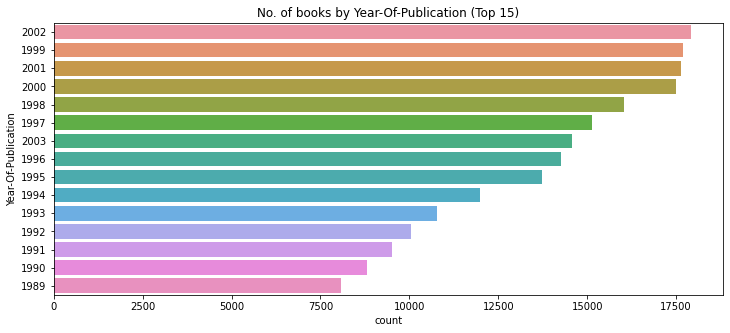

In [19]:
#Visualization
plt.figure(figsize=(12,5))
sns.countplot(y="Year-Of-Publication", data=books,order=books['Year-Of-Publication'].value_counts().index[0:15])
plt.title("No. of books by Year-Of-Publication (Top 15)")
plt.show()

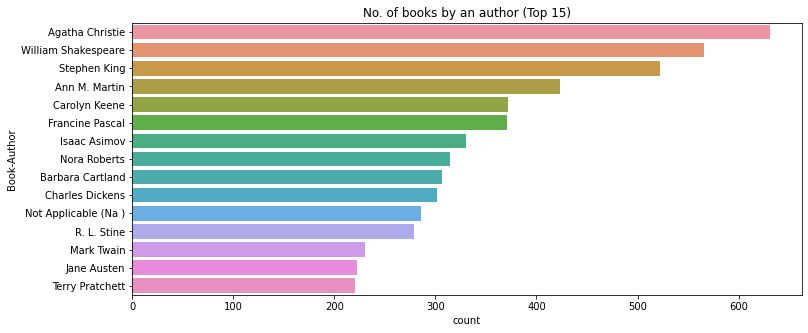

In [20]:
#Visualization
plt.figure(figsize=(12,5))
sns.countplot(y="Book-Author", data=books,order=books['Book-Author'].value_counts().index[0:15])
plt.title("No. of books by an author (Top 15)")
plt.show()

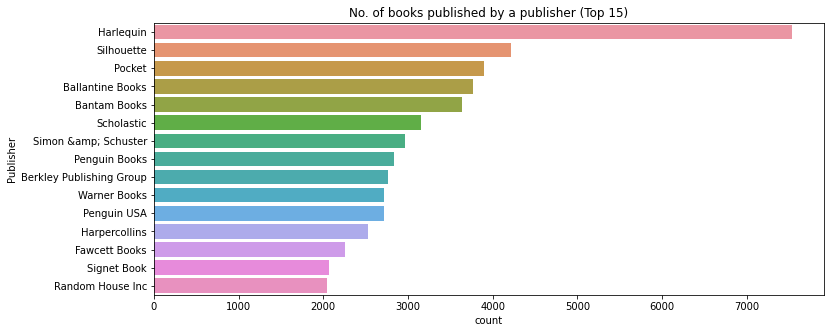

In [21]:
#Visualization
plt.figure(figsize=(12,5))
sns.countplot(y="Publisher", data=books,order=books['Publisher'].value_counts().index[0:15])
plt.title("No. of books published by a publisher (Top 15)")
plt.show()

####Users Dataset Pre-processing

In [22]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [23]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [24]:
#Checking for null values
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [25]:
users['Age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [26]:
#outliers removing
users.drop(users[users['Age']<5].index , axis=0 ,inplace=True)
users.drop(users[users['Age']>100].index , axis=0 ,inplace=True)

In [27]:
mean=round(users['Age'].mean())
mean

35

In [28]:
#filling null values with mean
users['Age'] = users['Age'].fillna(mean)

In [29]:
#changing Datatype
users['Age'] = users['Age'].astype(int)

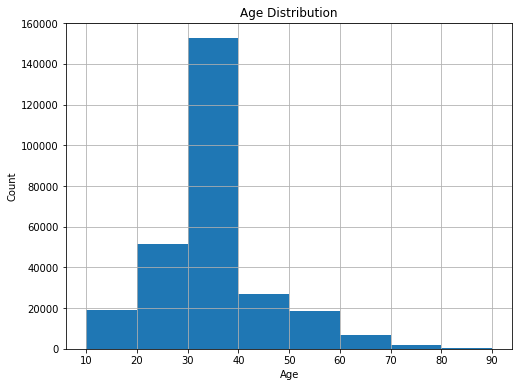

In [30]:

#Visualization
plt.figure(figsize=(8,6))
users['Age'].hist(bins=[10*i for i in range(1, 10)])     
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [31]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277610 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   User-ID   277610 non-null  int64 
 1   Location  277610 non-null  object
 2   Age       277610 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 8.5+ MB


In [32]:
#split location column
users= pd.concat([users['User-ID'],users['Age'], users['Location'].str.split(', ', expand=True)], axis=1)

In [33]:
users.loc[~users[3].isnull(),:]

,User-ID,Age,0,1,2,3,4,5,6,7,8
435,436,53,ivanhoe,melbourne,victoria,australia,None,None,None,None,None
814,815,43,davis bay,sechelt,british columbia,canada,None,None,None,None,None
840,841,24,saint charles,mo,missouri,usa,None,None,None,None,None
1459,1460,34,mansoura,dakahlia,mansoura,egypt,None,None,None,None,None
1520,1521,35,washington,d.c.,dc,usa,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
277645,277646,36,washington,dc,dc,usa,None,None,None,None,None
277717,277718,62,colorado springs,co 80901,colorado,usa,None,None,None,None,None
278028,278029,31,mansfield,nottinghamshire,england,united kingdom,None,None,None,None,None
278214,278215,28,nelson,motueka,nz,new zealand,None,None,None,None,None


In [34]:
#drop invalid values
users.drop(users.loc[~users[3].isnull(),:].index,axis=0,inplace=True)
users.drop(users.loc[users[2].isnull(),:].index,axis=0,inplace=True)
users.drop([3,4,5,6,7,8],axis=1,inplace=True)

In [35]:
users.rename(columns={0:'City',1:'State',2:'Country'},inplace=True)

In [36]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272036 entries, 0 to 278857
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   User-ID  272036 non-null  int64 
 1   Age      272036 non-null  int64 
 2   City     272036 non-null  object
 3   State    272036 non-null  object
 4   Country  272036 non-null  object
dtypes: int64(2), object(3)
memory usage: 12.5+ MB


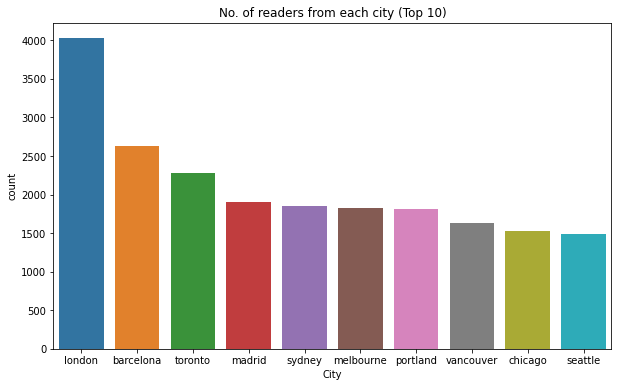

In [37]:
#Visualization
plt.figure(figsize=(10,6))
sns.countplot(x="City", data=users,order=users['City'].value_counts().index[0:10])
plt.title("No. of readers from each city (Top 10)")
plt.show()

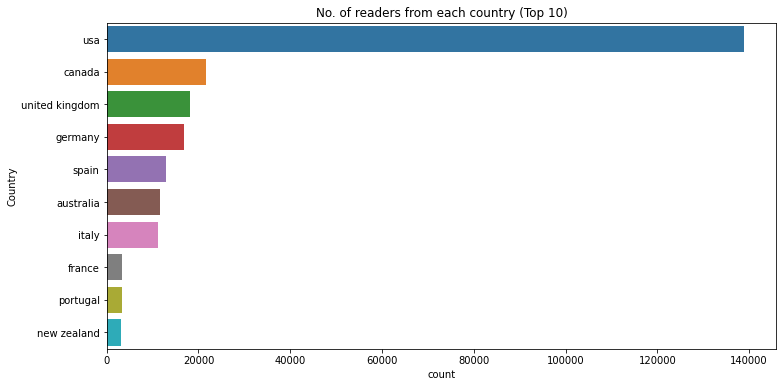

In [38]:
#Visualization
plt.figure(figsize=(12,6))
sns.countplot(y="Country", data=users, order=users['Country'].value_counts().index[0:10])
plt.title("No. of readers from each country (Top 10)")
plt.show()

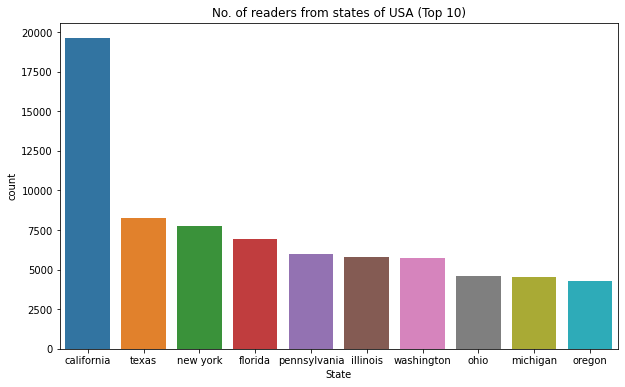

In [39]:
#Visualization
data=users[users['Country']=='usa']
plt.figure(figsize=(10,6))
sns.countplot(x="State", data=data,order=data['State'].value_counts().index[0:10])
plt.title("No. of readers from states of USA (Top 10)")
plt.show()

####Books-Ratings Dataset Pre-processing

In [40]:
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [41]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [42]:
# Checking for null values
rating.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [43]:
## Uppercasing all alphabets in ISBN
rating['ISBN'] = rating['ISBN'].str.upper()

In [44]:
#Check duplicate values
rating.duplicated().sum()

0

In [45]:
rating['Book-Rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

####Merge Books, Users and Rating Tables

In [46]:
dataset = pd.merge(books, rating, on='ISBN', how='inner')
dataset = pd.merge(dataset, users, on='User-ID', how='inner')

In [47]:
dataset.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age,City,State,Country
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0,18,stockton,california,usa
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,35,timmins,ontario,canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,8,0,35,timmins,ontario,canada
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,8,0,35,timmins,ontario,canada
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,8,0,35,timmins,ontario,canada


In [48]:
dataset.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'User-ID', 'Book-Rating', 'Age', 'City', 'State', 'Country'],
      dtype='object')

In [49]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000449 entries, 0 to 1000448
Data columns (total 11 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   ISBN                 1000449 non-null  object
 1   Book-Title           1000449 non-null  object
 2   Book-Author          1000449 non-null  object
 3   Year-Of-Publication  1000449 non-null  int64 
 4   Publisher            1000449 non-null  object
 5   User-ID              1000449 non-null  int64 
 6   Book-Rating          1000449 non-null  int64 
 7   Age                  1000449 non-null  int64 
 8   City                 1000449 non-null  object
 9   State                1000449 non-null  object
 10  Country              1000449 non-null  object
dtypes: int64(4), object(7)
memory usage: 91.6+ MB


In [50]:
# Checking for null values
dataset.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
User-ID                0
Book-Rating            0
Age                    0
City                   0
State                  0
Country                0
dtype: int64

In [51]:
#Check duplicate values
dataset.duplicated().sum()

0

In [52]:
## Explicit Ratings Dataset
dataset_exp = dataset[dataset['Book-Rating'] != 0].reset_index()

In [53]:
dataset_exp.head()

,index,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age,City,State,Country
0,1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,35,timmins,ontario,canada
1,9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,8,5,35,timmins,ontario,canada
2,12,0887841740,The Middle Stories,Sheila Heti,2004,House of Anansi Press,8,5,35,timmins,ontario,canada
3,13,1552041778,Jane Doe,R. J. Kaiser,1999,Mira Books,8,5,35,timmins,ontario,canada
4,15,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998,Brilliance Audio - Trade,8,6,35,timmins,ontario,canada


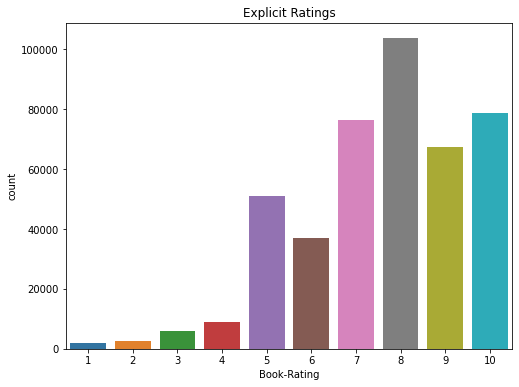

In [54]:
## Explicit Ratings
plt.figure(figsize=(8,6))
data = rating[rating['Book-Rating'] != 0]
sns.countplot(x="Book-Rating", data=data)
plt.title("Explicit Ratings")
plt.show()

In [55]:
# Implicit Ratings Dataset
dataset_imp = dataset[dataset['Book-Rating'] == 0].reset_index()

In [56]:
dataset_imp.head()

,index,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age,City,State,Country
0,0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0,18,stockton,california,usa
1,2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,8,0,35,timmins,ontario,canada
2,3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,8,0,35,timmins,ontario,canada
3,4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,8,0,35,timmins,ontario,canada
4,5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,8,0,35,timmins,ontario,canada


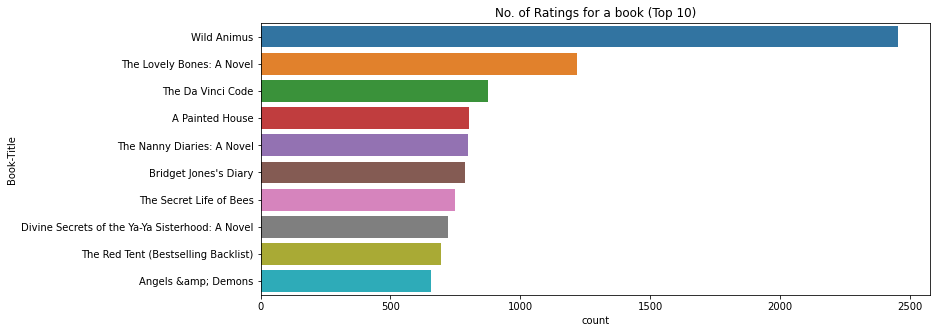

In [57]:
#Visualization
plt.figure(figsize=(12,5))
sns.countplot(y="Book-Title", data=dataset, order=dataset['Book-Title'].value_counts().index[0:10])
plt.title("No. of Ratings for a book (Top 10)")
plt.show()

In [58]:
num_of_rating = dataset.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_of_rating.rename(columns={'Book-Rating':'Total_ratings'},inplace=True)
num_of_rating=num_of_rating.sort_values('Total_ratings', ascending=False)
num_of_rating.head()

,Book-Title,Total_ratings
231771,Wild Animus,2456
193646,The Lovely Bones: A Novel,1219
181065,The Da Vinci Code,875
5233,A Painted House,803
196523,The Nanny Diaries: A Novel,797


In [59]:
avg_ratings = dataset_exp.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_ratings.rename(columns={'Book-Rating':'avg_ratings'},inplace=False)
avg_ratings=avg_ratings.sort_values('Book-Title', ascending=True)
avg_ratings.head(15)

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,9.000000
1,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
2,Dark Justice,10.000000
3,Earth Prayers From around the World: 365 Pray...,7.142857
4,Final Fantasy Anthology: Official Strategy Gu...,10.000000
5,Flight of Fancy: American Heiresses (Zebra Ba...,8.000000
6,Garfield Bigger and Better (Garfield (Numbere...,7.000000
7,God's Little Promise Book,9.000000
8,Good Wives: Image and Reality in the Lives of...,8.000000
9,Goosebumps Monster Edition 1: Welcome to Dead...,6.666667


###Collaborative Filtering Based Recommender System

In [60]:
x = dataset.groupby('User-ID').count()['Book-Rating']>200
users = x[x].index

In [61]:
filtered_rating = dataset[dataset['User-ID'].isin(users)]

In [62]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

In [63]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]


In [64]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')


In [65]:
pt.fillna(0,inplace=True)


In [66]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271448,271705,273979,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_scores = cosine_similarity(pt)


In [68]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:6]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        
        data.append(item)
    
    return data

In [69]:
recommend("Harry Potter and the Goblet of Fire (Book 4)")

[['Harry Potter and the Prisoner of Azkaban (Book 3)'],
 ['Harry Potter and the Chamber of Secrets (Book 2)'],
 ['Harry Potter and the Order of the Phoenix (Book 5)'],
 ["Harry Potter and the Sorcerer's Stone (Book 1)"],
 ["Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))"]]

###Content Based Recommender System

In [70]:
df = pd.DataFrame(dataset_exp['Book-Title'].value_counts())
df['Total-Ratings'] = df['Book-Title']
df['Book-Title'] = df.index
df.reset_index(level=0, inplace=True)
df = df.drop('index',axis=1)

df = dataset_exp.merge(df, left_on = 'Book-Title', right_on = 'Book-Title', how = 'left')
df = df.drop(['Year-Of-Publication','Publisher','Age','City','State','Country'], axis=1)

In [71]:
popularity_threshold = 80
popular_book = df[df['Total-Ratings'] >= popularity_threshold]
popular_book = popular_book.reset_index(drop = True)
popular_book.shape

(41108, 7)

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(ngram_range=(1, 2), min_df = 1, stop_words='english')
tfidf_matrix = tf.fit_transform(popular_book['Book-Title'])
tfidf_matrix.shape

(41108, 1046)

In [73]:
normalized_df = tfidf_matrix.astype(np.float32)
cosine_similarities = cosine_similarity(normalized_df, normalized_df)
cosine_similarities.shape

(41108, 41108)

In [74]:
# print("Recommended Books:\n")
def recommend(book_name):
  isbn = books.loc[books['Book-Title'] == book_name].reset_index(drop = True).iloc[0]['ISBN']
  content = []
  reco=[]
  idx = popular_book.index[popular_book['ISBN'] == isbn].tolist()[0]
  similar_indices = cosine_similarities[idx].argsort()[::-1]
  similar_items = []
  for i in similar_indices:
      if popular_book['Book-Title'][i] != book_name and popular_book['Book-Title'][i] not in similar_items and len(similar_items) < 5:
          similar_items.append(popular_book['Book-Title'][i])

  for book in similar_items:
    reco.append(book)
  return(reco)

In [75]:
recommend("Harry Potter and the Goblet of Fire (Book 4)")

["Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
 'Harry Potter and the Chamber of Secrets (Book 2)',
 "Harry Potter and the Sorcerer's Stone (Book 1)",
 'Harry Potter and the Prisoner of Azkaban (Book 3)',
 'Harry Potter and the Order of the Phoenix (Book 5)']